# Electric Vehicle (EV) Sales and Adoption Project

## 1. Project Overview

In this project I collect automobile data from Kaggle.

## 2. Data Collection & Cleaning

### 2.1 Important Libraries

In [5]:
import pandas as pd
import numpy as np
from numpy import expm1, log1p
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

### 2.2 Data Collection

I retrieved the [Electric Vehicle Sales datasets](https://www.kaggle.com/datasets/rameezmeerasahib/electric-vehicle-ev-sales-and-adoption/data) from Kaggle and loaded them into Jupyter Notebook. Let's now initialize pandas DataFrames for analysis:

In [7]:
# Create DataFrame to analyze EV sales trends
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

In [8]:
train_set.head()

,Date,Region,Brand,Model,Vehicle_Type,Battery_Capacity_kWh,Discount_Percentage,Customer_Segment,Fast_Charging_Option,Units_Sold,Revenue
0,2023-07,Oceania,Toyota,i4,Crossover,62,6,High Income,No,260,3699780
1,2023-03,Oceania,Toyota,Leaf,Truck,70,19,High Income,Yes,347,7801424
2,2023-05,North America,Toyota,ID.5,Crossover,81,13,Middle Income,No,294,4813013
3,2023-02,Oceania,Tesla,Corolla EV,Truck,73,4,High Income,Yes,281,7484912
4,2023-10,North America,BYD,Leaf,Coupe,52,4,High Income,No,166,4025360


In [9]:
test_set.head()

,Date,Region,Brand,Model,Vehicle_Type,Battery_Capacity_kWh,Discount_Percentage,Customer_Segment,Fast_Charging_Option
0,2023-04,Oceania,Volkswagen,Model 3,SUV,45,16,Budget Conscious,No
1,2023-10,Oceania,Ford,Model 3,Sedan,89,5,Tech Enthusiast,Yes
2,2023-10,South America,Volkswagen,Atto 3,Sedan,61,4,Budget Conscious,Yes
3,2023-02,Africa,Volkswagen,Corolla EV,Crossover,100,16,Eco-Conscious,No
4,2023-10,North America,Tesla,Rio EV,Sedan,70,8,Eco-Conscious,Yes


The training set will be used to train and evaluate the model, while the unseen test set will enable predictions of both future vehicle sales volume and the corresponding revenue.

### 2.3 Data Cleaning

In [10]:
train_set.shape

(531, 11)

In [11]:
test_set.shape

(275, 9)

Let's see if there are any missing values:

In [12]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531 entries, 0 to 530
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  531 non-null    object
 1   Region                531 non-null    object
 2   Brand                 531 non-null    object
 3   Model                 531 non-null    object
 4   Vehicle_Type          531 non-null    object
 5   Battery_Capacity_kWh  531 non-null    int64 
 6   Discount_Percentage   531 non-null    int64 
 7   Customer_Segment      531 non-null    object
 8   Fast_Charging_Option  531 non-null    object
 9   Units_Sold            531 non-null    int64 
 10  Revenue               531 non-null    int64 
dtypes: int64(4), object(7)
memory usage: 45.8+ KB


In [13]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  275 non-null    object
 1   Region                275 non-null    object
 2   Brand                 275 non-null    object
 3   Model                 275 non-null    object
 4   Vehicle_Type          275 non-null    object
 5   Battery_Capacity_kWh  275 non-null    int64 
 6   Discount_Percentage   275 non-null    int64 
 7   Customer_Segment      275 non-null    object
 8   Fast_Charging_Option  275 non-null    object
dtypes: int64(2), object(7)
memory usage: 19.5+ KB


There are not missing values for both sets. Let's check for outliers:

In [14]:
train_set.describe(include='all')

,Date,Region,Brand,Model,Vehicle_Type,Battery_Capacity_kWh,Discount_Percentage,Customer_Segment,Fast_Charging_Option,Units_Sold,Revenue
count,531,531,531,531,531,531.000000,531.000000,531,531,531.000000,5.310000e+02
unique,12,6,9,17,6,NaN,NaN,5,2,NaN,NaN
top,2023-06,North America,Kia,Atto 3,Hatchback,NaN,NaN,Budget Conscious,Yes,NaN,NaN
freq,61,154,81,55,178,NaN,NaN,136,323,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,69.408663,9.013183,NaN,NaN,227.881356,4.918762e+06
std,NaN,NaN,NaN,NaN,NaN,17.627504,5.966085,NaN,NaN,97.905957,2.661565e+06
min,NaN,NaN,NaN,NaN,NaN,40.000000,0.000000,NaN,NaN,50.000000,8.170320e+05
25%,NaN,NaN,NaN,NaN,NaN,53.000000,3.000000,NaN,NaN,147.000000,2.944326e+06
50%,NaN,NaN,NaN,NaN,NaN,70.000000,8.000000,NaN,NaN,234.000000,4.575344e+06
75%,NaN,NaN,NaN,NaN,NaN,84.000000,14.000000,NaN,NaN,313.500000,6.469173e+06


In [15]:
test_set.describe(include='all')

,Date,Region,Brand,Model,Vehicle_Type,Battery_Capacity_kWh,Discount_Percentage,Customer_Segment,Fast_Charging_Option
count,275,275,275,275,275,275.000000,275.000000,275,275
unique,12,6,9,17,6,NaN,NaN,5,2
top,2023-07,Oceania,Kia,Rio EV,Hatchback,NaN,NaN,Budget Conscious,Yes
freq,34,78,45,27,85,NaN,NaN,92,184
mean,NaN,NaN,NaN,NaN,NaN,69.440000,8.541818,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,17.122334,5.717903,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,40.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,56.000000,4.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,69.000000,8.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,83.500000,14.000000,NaN,NaN


<Axes: >

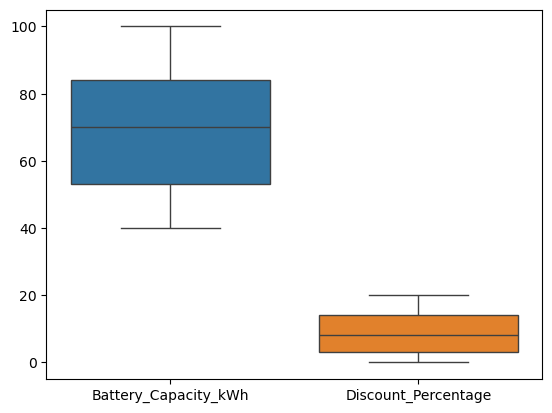

In [16]:
sns.boxplot(train_set[['Battery_Capacity_kWh', 'Discount_Percentage']])

<Axes: >

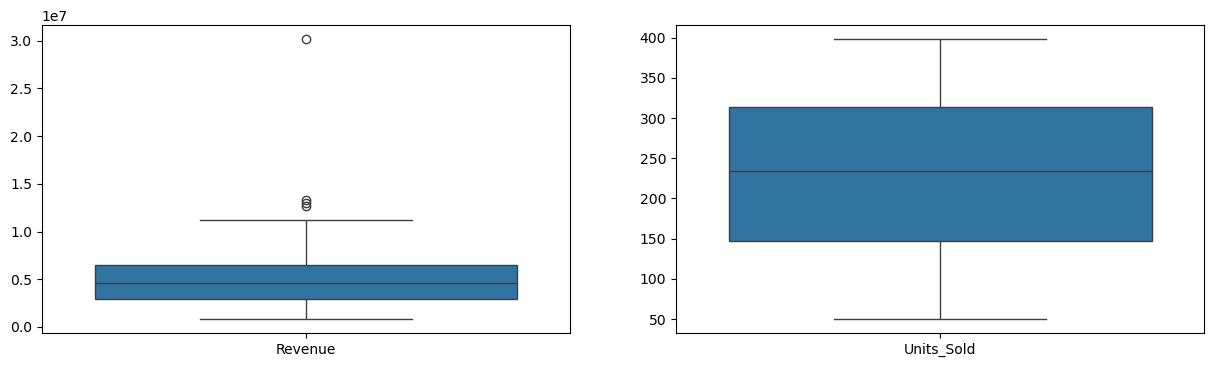

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(15,4))
sns.boxplot((train_set[['Revenue']]), ax=ax[0])
sns.boxplot(train_set[['Units_Sold']], ax=ax[1])

<Axes: xlabel='Units_Sold', ylabel='Count'>

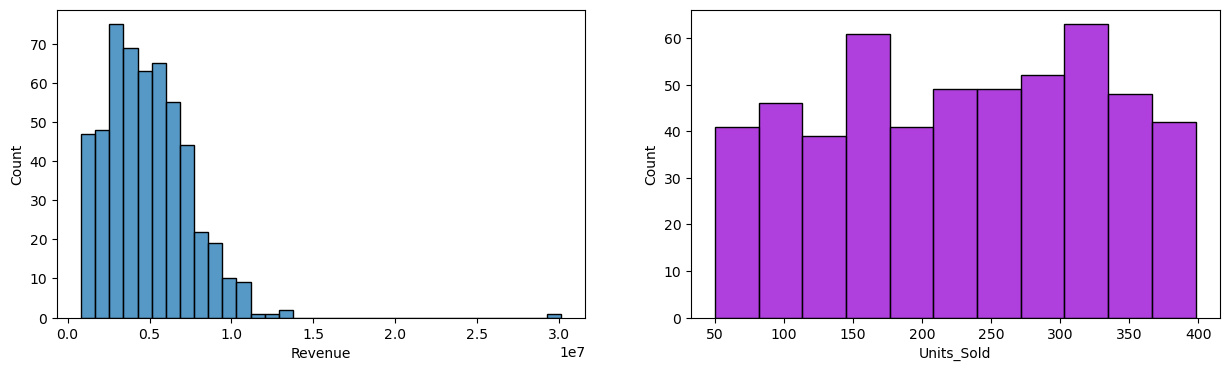

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(15,4))
sns.histplot(train_set['Revenue'], ax=ax[0])
sns.histplot(train_set['Units_Sold'], ax=ax[1], color='darkviolet')

From the left histogram we observe a _right-skewed_ distribution. The majority of the data is placed in the left of mean and with a long tail of a few very large observations extending toward 3e7.

<Axes: >

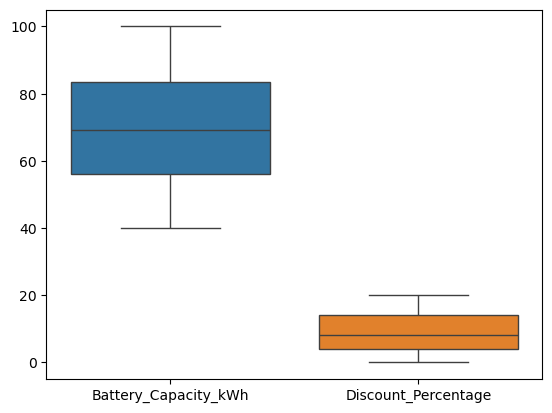

In [19]:
sns.boxplot(test_set[['Battery_Capacity_kWh', 'Discount_Percentage']])

So, there are some outliers for **Revenue**. I will keep the data as it is and if they will affect the performance of the ML models, I will delete some of them.

It's useful to transform bolean values to numerical 0/1:

In [20]:
train_set['Fast_Charging_Option'] = train_set['Fast_Charging_Option'].map({'Yes': 1, 'No': 0})
test_set['Fast_Charging_Option'] = test_set['Fast_Charging_Option'].map({'Yes': 1, 'No': 0})

Finally, we will transform **Date** column to datetime type:

In [21]:
train_set['Date'] = pd.to_datetime(train_set['Date'])
test_set['Date'] = pd.to_datetime(test_set['Date'])

In [22]:
train_set['Date'].dt.year.unique()

array([2023])

In [23]:
test_set['Date'].dt.year.unique()

array([2023])

We see that the datasets are reffering to 2023's sales. So, we will keep only the **Month** as column:

In [24]:
train_set['Month'] = train_set['Date'].dt.month
test_set['Month'] = test_set['Date'].dt.month

In [25]:
# Delete 'Date' column
train_set.drop('Date', axis=1, inplace=True)
test_set.drop('Date', axis=1, inplace=True)

In [26]:
train_set = train_set[['Month', 'Region', 'Brand', 'Model', 'Vehicle_Type', 'Battery_Capacity_kWh',
       'Discount_Percentage', 'Customer_Segment', 'Fast_Charging_Option',
       'Units_Sold', 'Revenue']]

In [27]:
train_set.head(3)

,Month,Region,Brand,Model,Vehicle_Type,Battery_Capacity_kWh,Discount_Percentage,Customer_Segment,Fast_Charging_Option,Units_Sold,Revenue
0,7,Oceania,Toyota,i4,Crossover,62,6,High Income,0,260,3699780
1,3,Oceania,Toyota,Leaf,Truck,70,19,High Income,1,347,7801424
2,5,North America,Toyota,ID.5,Crossover,81,13,Middle Income,0,294,4813013


In [28]:
test_set = test_set[['Month', 'Region', 'Brand', 'Model', 'Vehicle_Type', 'Battery_Capacity_kWh',
       'Discount_Percentage', 'Customer_Segment', 'Fast_Charging_Option']]

test_set.head(3)

,Month,Region,Brand,Model,Vehicle_Type,Battery_Capacity_kWh,Discount_Percentage,Customer_Segment,Fast_Charging_Option
0,4,Oceania,Volkswagen,Model 3,SUV,45,16,Budget Conscious,0
1,10,Oceania,Ford,Model 3,Sedan,89,5,Tech Enthusiast,1
2,10,South America,Volkswagen,Atto 3,Sedan,61,4,Budget Conscious,1


## 3. Exploratory Data Analysis (EDA)

The best way to understand our data and extract information from it, is by using graphs (Data Visualization).

So, let's see the correlation of Revenue and Units_Sold with Month:

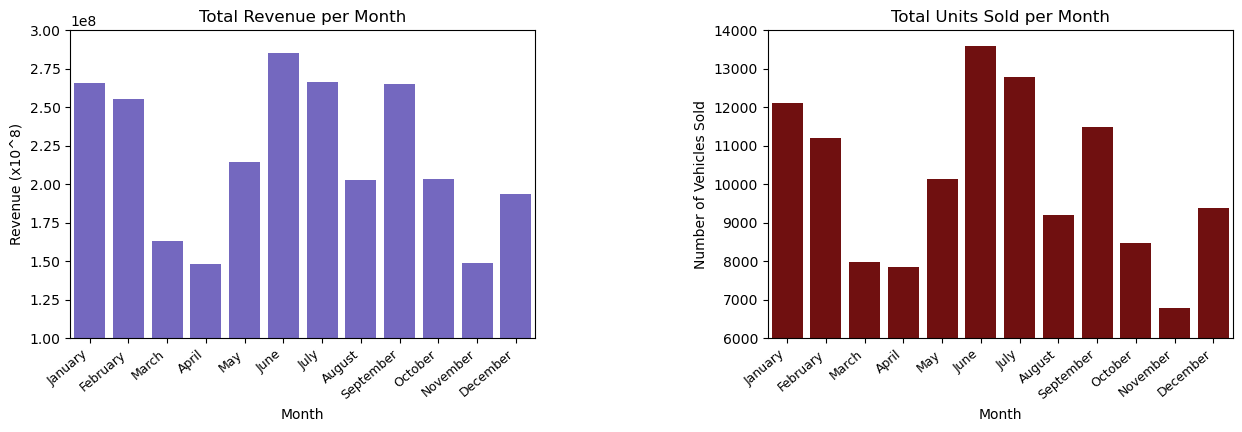

In [56]:
month_rev= train_set.groupby(['Month'])['Revenue'].sum()

month_un = train_set.groupby('Month')['Units_Sold'].sum()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

fig, axes = plt.subplots(1, 2, figsize=(15,4))
sns.barplot(data=month_rev, ax=axes[0], color='slateblue')
axes[0].set_ylim(1e8, 3e8)
axes[0].set_ylabel('Revenue (x10^8)')
axes[0].set_xlabel('Month')
axes[0].set_xticks(ticks=range(12), ha='right', labels=month_names.values())
axes[0].tick_params(axis='x', rotation=40, labelsize=9)
axes[0].set_title('Total Revenue per Month')

sns.barplot(data=month_un, color='maroon', ax=axes[1])
axes[1].set_ylim(6000, 14000)
axes[1].set_ylabel('Number of Vehicles Sold')
axes[1].set_xlabel('Month')
axes[1].set_xticks(ticks=range(12), ha='right', labels=month_names.values())
axes[1].tick_params(axis='x', rotation=40, labelsize=9)
axes[1].set_title('Total Units Sold per Month')

plt.subplots_adjust(wspace=0.5)
plt.show()

As we expected, **Revenue** and **Units_Sold** follow almost the same pattern.

We, see that barplots are an excellent tool for visualizing trends and correlations between variables.  

The following plots will analyze the relationships between the target variables and these features:  
- `Region`  
- `Brand`  
- `Vehicle_Type`  
- `Customer_Segment`  
- `Fast_Charging_Option`  

Next, I’ll define a helper function to automate barplot generation and avoid repetitive code:

In [61]:
def create_barplot(
    grouping_col,
    x1='',
    x2='',
    y='Revenue',
    y2='Units_Sold',
    lim_rev=None,
    lim_un=None):    

    # Grouping the categorical variable that we are going to plot
    gp_rev = pd.DataFrame(train_set.groupby(grouping_col, as_index=False)['Revenue'].sum())
    gp_un = pd.DataFrame(train_set.groupby(grouping_col, as_index=False)['Units_Sold'].sum())
    order_rev = gp_rev.sort_values(by="Revenue")[grouping_col]
    order_un = gp_un.sort_values(by="Units_Sold")[grouping_col]
    
    fig, axes = plt.subplots(1, 2, figsize=(15,3.5))
    
    # I created the function with two options in my mind
    # a) Normal barplot (if the graph looks good)
    # b) Horizondal barplot (if the values have long names so in x-axis they don't look good)
    # And I can adjust y-axis value's range to have a better graph
    
    if x1 == '' and x2 == '' and y=='Revenue' and y2=='Units_Sold':

        x1 = x2 = grouping_col
        
        #1st Graph Total Revenue
        sns.barplot(data=gp_rev, y=y, x=x1, order=order_rev, ax=axes[0], color='brown')
        axes[0].set_ylabel('Revenue (x10^8)')
        axes[0].set_ylim(lim_rev)
        axes[0].tick_params(axis='x', labelsize=9)
        axes[0].tick_params(axis='y', labelsize=9)
        axes[0].set_xlabel(grouping_col)
        axes[0].set_title(f'Total Revenue per {grouping_col}')
       
        #2nd Graph Number of Vehicles Sold
        sns.barplot(data=gp_un, y=y2, x=x2, order=order_un, ax=axes[1], color='slateblue')
        axes[1].set_ylabel('Number of Vehicles Sold')
        axes[1].set_ylim(lim_un)
        axes[1].tick_params(axis='x', labelsize=9)
        axes[1].tick_params(axis='y', labelsize=9)
        axes[1].set_xlabel(grouping_col)
        axes[1].set_title(f'Total Units Sold per {grouping_col}')
           
        plt.subplots_adjust(wspace=0.5)
        plt.show()

    else:

        y = y2 = grouping_col
        x1= 'Revenue'
        x2 = 'Units_Sold'
        
        #1st Graph Total Revenue
        sns.barplot(data=gp_rev, y=y, x=x1, order=order_rev, ax=axes[0], color='brown')
        axes[0].set_xlabel('Revenue (x10^8)')
        axes[0].set_xlim(lim_rev)
        axes[0].tick_params(axis='x', labelsize=9)
        axes[0].tick_params(axis='y', labelsize=9)
        axes[0].set_ylabel(grouping_col)
        axes[0].set_title(f'Total Revenue per {grouping_col}')

        #2nd Graph Number of Vehicles Sold
        sns.barplot(data=gp_un, y=y2, x=x2, order=order_un, ax=axes[1], color='cornflowerblue')
        axes[1].set_xlabel('Number of Vehicles Sold')
        axes[1].set_xlim(lim_un)
        axes[1].tick_params(axis='x', labelsize=9)
        axes[1].tick_params(axis='y', labelsize=9)
        axes[1].set_ylabel(grouping_col)
        axes[1].set_title(f'Total Units Sold per {grouping_col}')

        plt.subplots_adjust(wspace=0.5)
        plt.show()

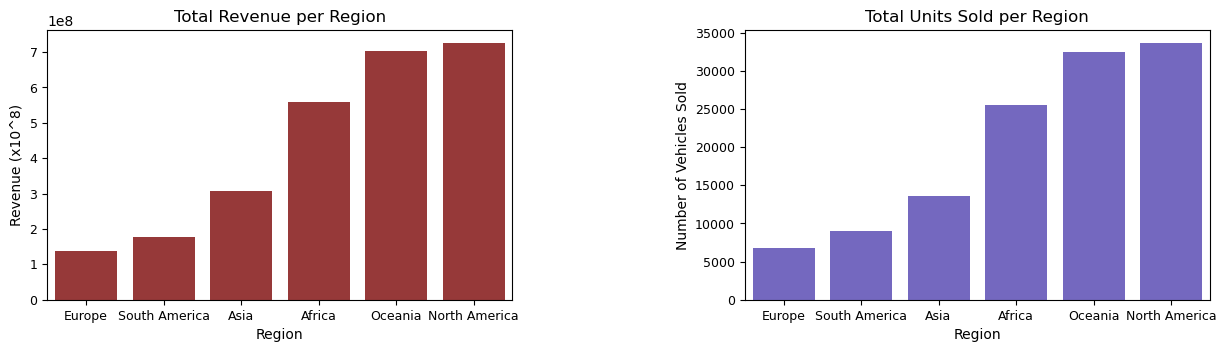

In [62]:
create_barplot('Region')

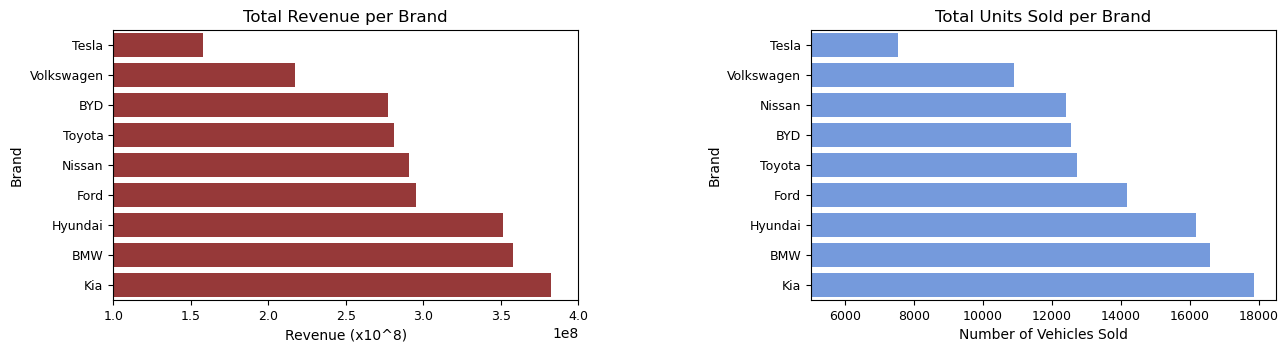

In [63]:
create_barplot('Brand', y='Brand', lim_rev=[1e8,4e8], lim_un=[5000, 18500])

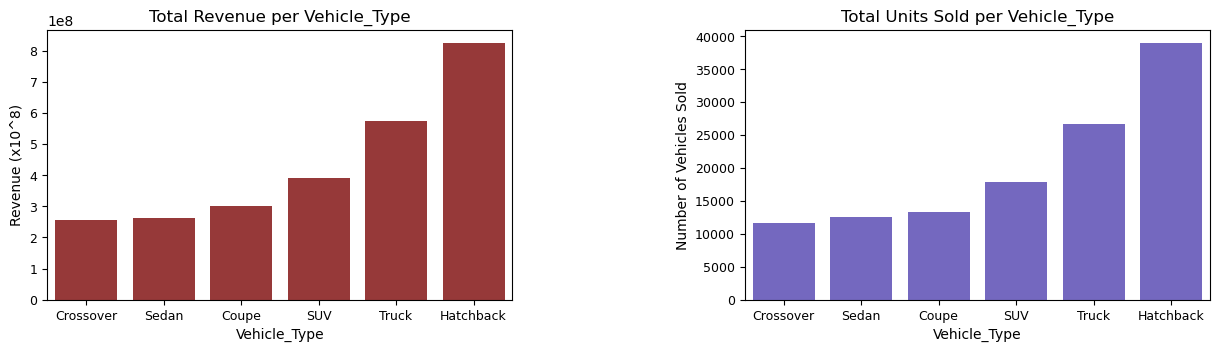

In [64]:
create_barplot('Vehicle_Type')

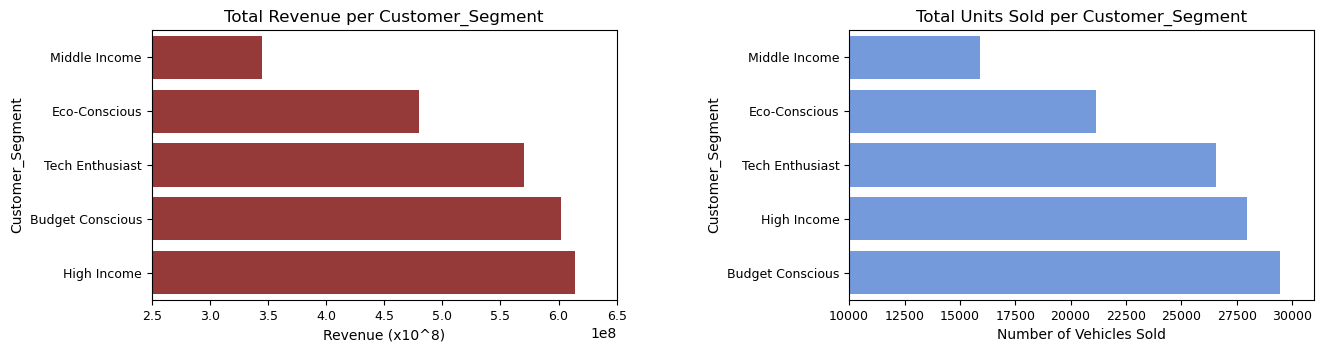

In [65]:
create_barplot('Customer_Segment', y='Customer_Segment', lim_rev=[2.5e8, 6.5e8], lim_un=[1e4, 3.1e4])

Text(0.5, 1.0, 'Total Number of Sales per Charging Option')

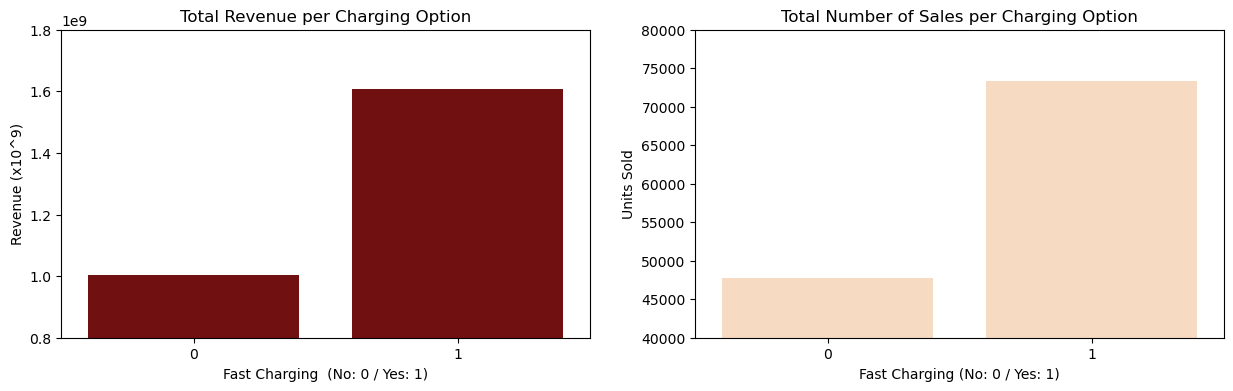

In [67]:
fig, ax = plt.subplots(1, 2, figsize=(15,4))
sns.barplot(data=train_set, x='Fast_Charging_Option', y='Revenue', estimator='sum', color='maroon', errorbar=None, ax=ax[0])
ax[0].set_ylabel('Revenue (x10^9)')
ax[0].set_ylim([0.8e9, 1.8e9])
ax[0].set_xlabel('Fast Charging  (No: 0 / Yes: 1)')
ax[0].set_title('Total Revenue per Charging Option')

sns.barplot(data=train_set, x='Fast_Charging_Option', y='Units_Sold', estimator='sum', color='peachpuff', errorbar=None, ax=ax[1])
ax[1].set_ylabel('Units Sold')
ax[1].set_ylim([4e4, 8e4])
ax[1].set_xlabel('Fast Charging (No: 0 / Yes: 1)')
ax[1].set_title('Total Number of Sales per Charging Option')

Now, we will explore the two numerical variables **Battery_Capacity_kWh** and **Discount_Percentage**. Once again, I will create a helper function just for the graphs:

In [39]:
def create_scatterplot(x):
    
    fig, axes = plt.subplots(1, 2, figsize=(15,4))

    # Revenue Graph
    sns.scatterplot(data=train_set, x=x, y='Revenue', ax=axes[0])
    axes[0].set_ylabel('Revenue (x10^6)')
    axes[0].set_xlabel(x)
    axes[0].set_title(f'Revenue vs {x}')

    # Number of Sales Graph
    sns.scatterplot(data=train_set, x=x, y='Units_Sold', ax=axes[1])
    axes[1].set_ylabel('Number of Vehicles Sold')
    axes[1].set_xlabel(x)
    axes[1].set_title(f'Number of Vehicles Sold vs {x}')

    plt.subplots_adjust(wspace=0.5)
    plt.show()

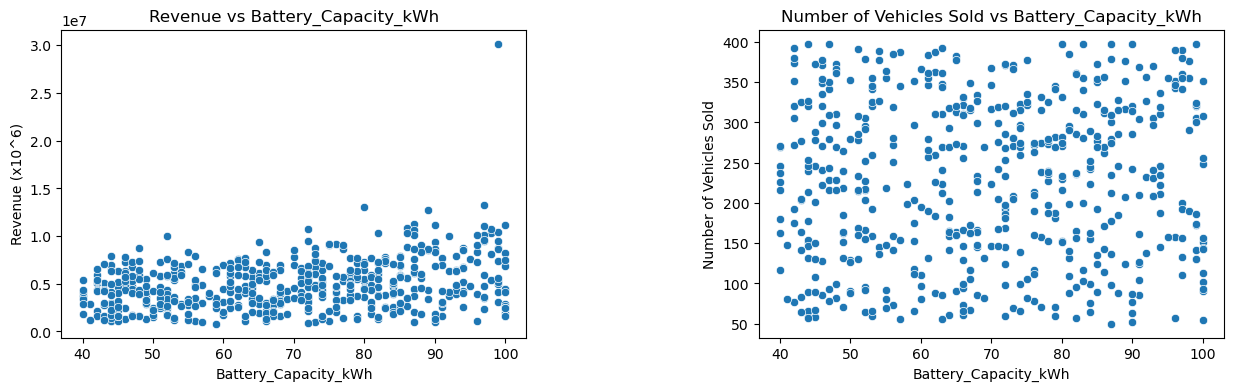

In [40]:
create_scatterplot('Battery_Capacity_kWh')

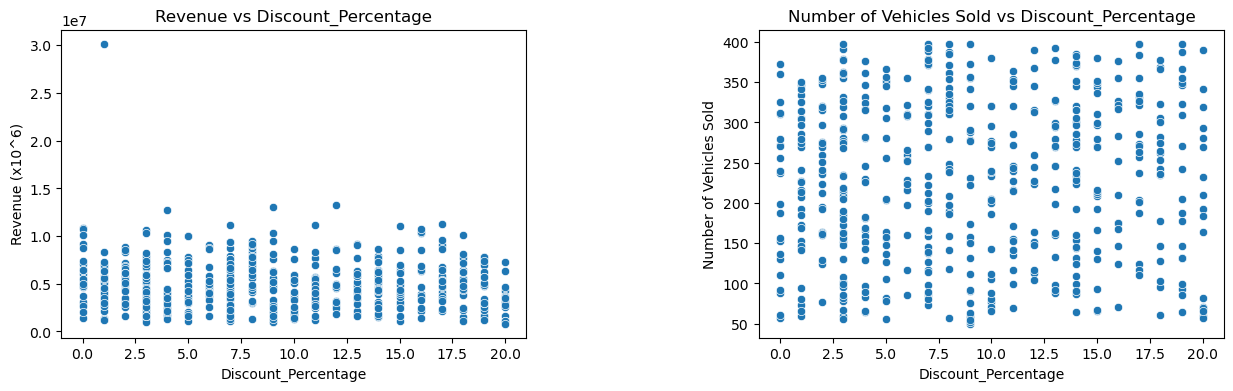

In [41]:
create_scatterplot('Discount_Percentage')

At first glance, there appears to be no obvious correlation between the numerical features and target variables. To verify this, I'll examine:  
- **Pearson coefficients** (for linear relationships)  
- **Spearman coefficients** (for monotonic relationships)  

These tests will help determine whether any statistically significant relationships exist that aren't visually apparent in the initial plots.  

In [43]:
print("Pearson Correlation (Battery Capacity):", train_set['Battery_Capacity_kWh'].corr(train_set['Revenue'], method='pearson'))
print("Spearman Correlation (Battery Capacity):", train_set['Battery_Capacity_kWh'].corr(train_set['Revenue'], method='spearman'))

print("Pearson Correlation (Discount):", train_set['Discount_Percentage'].corr(train_set['Revenue'], method='pearson'))
print("Spearman Correlation (Discount):", train_set['Discount_Percentage'].corr(train_set['Revenue'], method='spearman'))

Pearson Correlation (Battery Capacity): 0.2968831063743941
Spearman Correlation (Battery Capacity): 0.2629070094550275
Pearson Correlation (Discount): -0.08681811769575203
Spearman Correlation (Discount): -0.0769796585175306


1. **Battery Capacity**  
   - Has a small positive correlation with the target (0.30 Pearson / 0.26 Spearman)
   - Pearson (0.30) > Spearman (0.26) suggests the relationship is slightly more linear than monotonic  
   - While statistically detectable, this represents a small effect size (Cohen's rules: 0.1=small, 0.3=medium)

2. **Discount**  
   - Almost no correlation (values close to zero: -0.08 and -0.07) 
   - The consistent direction (negative) but tiny magnitude suggests random noise rather than a true association

So, I end up in the following conlusions:
- Battery Capacity might be useful for further investigation
- Discount appears unimportant for predicting the target variable

Let's explore the two variables a little more:

Text(0.5, 1.0, 'Battery Capacity Distribution')

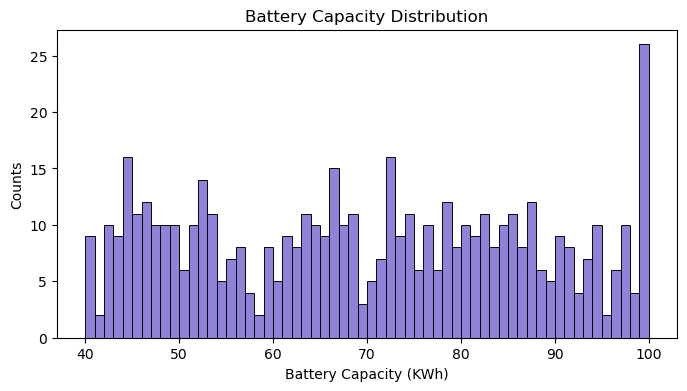

In [45]:
plt.figure(figsize=(8,4))
sns.histplot(train_set, x='Battery_Capacity_kWh', bins=60, color='slateblue')
plt.xlabel('Battery Capacity (KWh)')
plt.ylabel('Counts')
plt.title('Battery Capacity Distribution')

Text(0.5, 1.0, 'Discount Percentage Distribution')

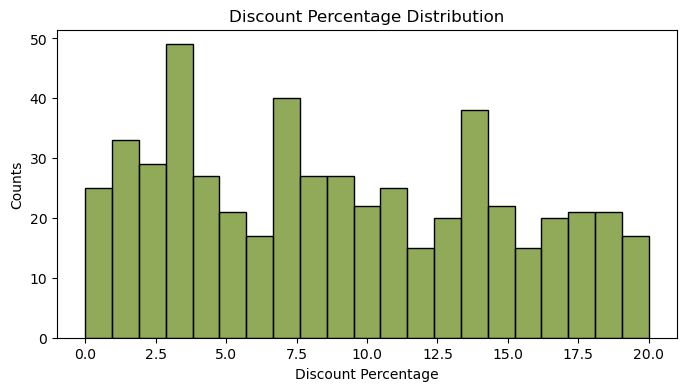

In [46]:
plt.figure(figsize=(8,4))
sns.histplot(train_set, x='Discount_Percentage', bins=21, color='olivedrab')
plt.xlabel('Discount Percentage')
plt.ylabel('Counts')
plt.title('Discount Percentage Distribution')

It might be useful to explore if there is a hidden trend as the capacity increase. For this reason, I will create a function that groups a variable and then creates a barplot for *Revenue* and *Units_Sold* against the grouped variable:

In [42]:
def create_plots_with_bins(variable, bins):
    
    # Bins Creation
    train = train_set.copy()
    train['cap_bin'] = pd.qcut(train['Battery_Capacity_kWh'], q=bins, 
                               labels = [f"Q{i+1}" for i in range(bins)])
    
    # Average Values
    bin_stats = train.groupby('cap_bin', observed=False).agg(
        Revenue_mean=('Revenue', 'mean'),
        Units_mean  =('Units_Sold', 'mean')
    ).reset_index()
    
    # Barplot for Revenue
    fig, ax = plt.subplots(1, 2, figsize=(15, 4))
    sns.barplot(
        data=bin_stats,
        x='cap_bin',
        y='Revenue_mean',
        color='firebrick',
        order=bin_stats['cap_bin'],
        ax=ax[0]
    )
    ax[0].set_title(f'Average Revenue per {variable} Category')
    ax[0].set_xlabel(f'{variable} Category')
    ax[0].set_ylabel('Revenue')
    ax[0].set_ylim([3e6, 7e6])
    ax[0].tick_params(axis='x', rotation=30, labelsize=9)

    # Line plot για Units_Sold
    sns.lineplot(
        data=bin_stats,
        x='cap_bin',
        y='Units_mean',
        marker='o',
        color='cornflowerblue',
        ax=ax[1]
    )
    ax[1].set_title(f'Average Number of Sales per {variable} Category')
    ax[1].set_xlabel(f'{variable} Category')
    ax[1].set_ylabel('Number of Sales')
    ax[1].tick_params(axis='x', rotation=30, labelsize=9)
    
    plt.subplots_adjust(wspace=0.5)
    plt.show()

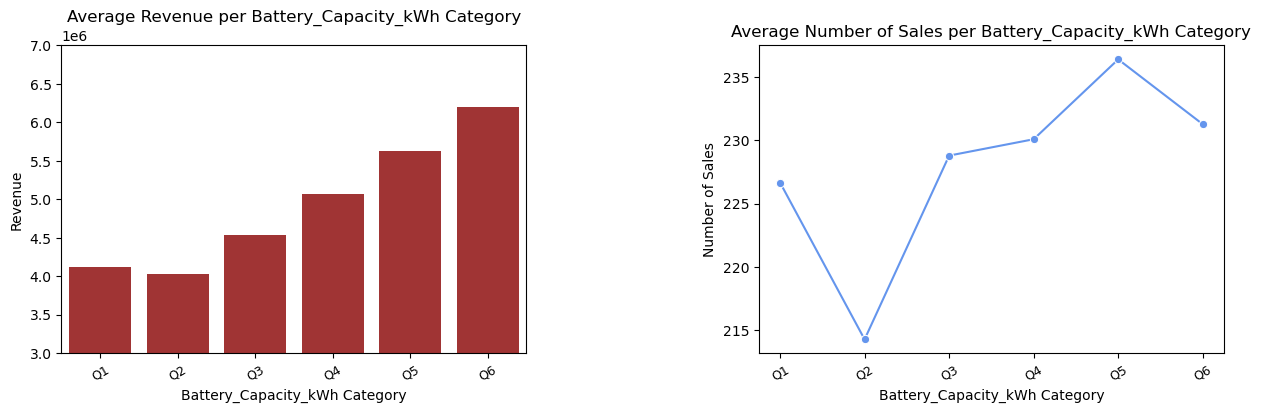

In [43]:
create_plots_with_bins('Battery_Capacity_kWh', 6)

The same for the *Discount_Percentage*:

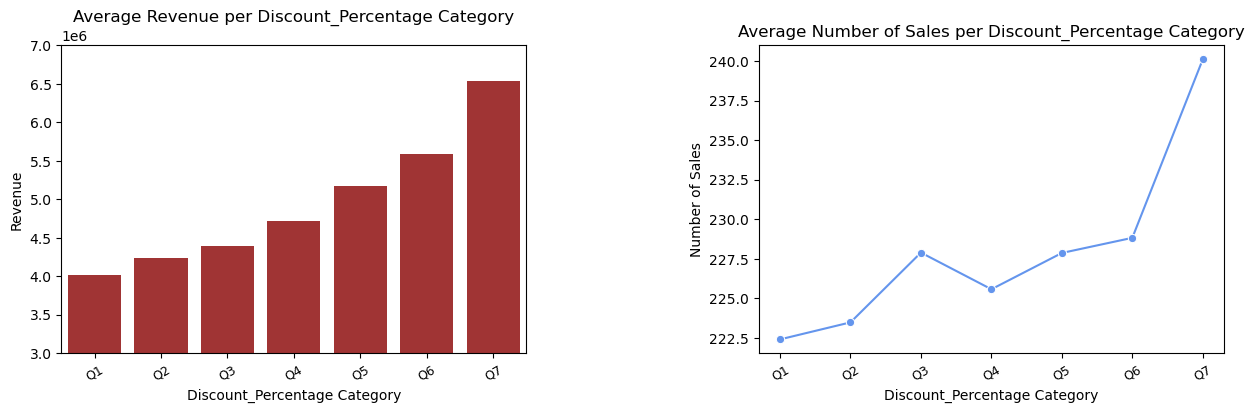

In [44]:
create_plots_with_bins('Discount_Percentage', 7)

We notice that as *Battery Capacity* and *Discount Percentage* increase, **Revenue** and **Units Sold** also tend to rise. This pattern might be useful for the predictive model development.

Some final visualizations to explore any other insights:

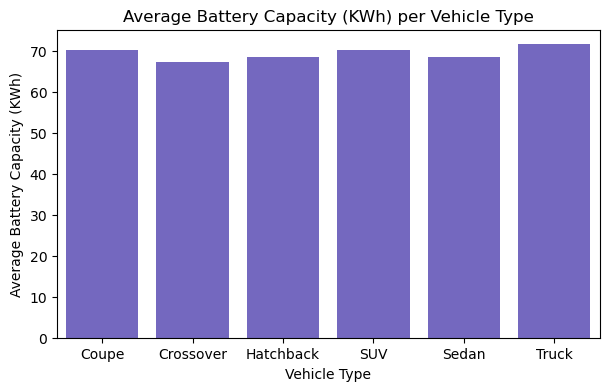

In [50]:
rev_cartype = train_set.groupby('Vehicle_Type', as_index=False)['Battery_Capacity_kWh'].mean()

plt.figure(figsize=(7,4))
sns.barplot(rev_cartype, x='Vehicle_Type', y='Battery_Capacity_kWh', color='slateblue')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Battery Capacity (KWh)')
plt.title('Average Battery Capacity (KWh) per Vehicle Type')
plt.show()

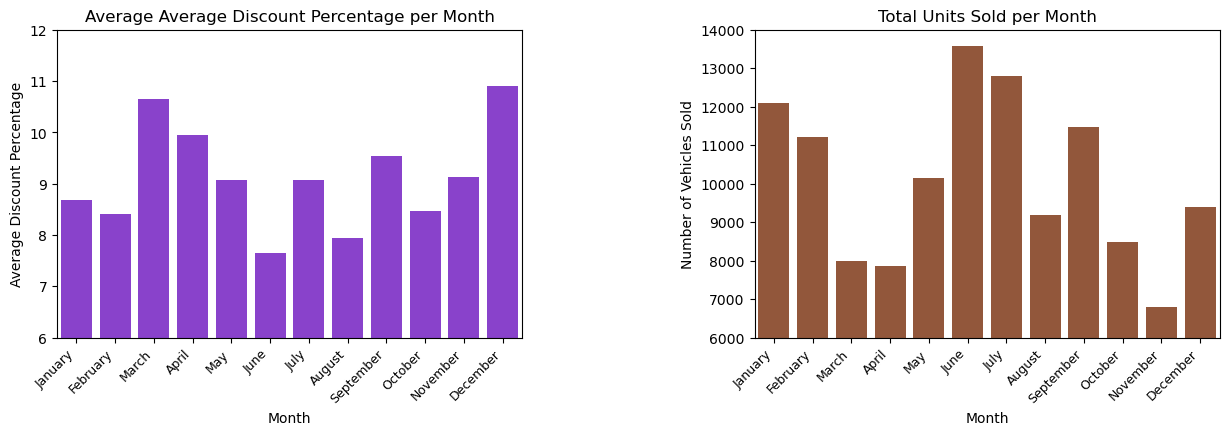

In [68]:
rev_cartype = train_set.groupby('Month', as_index=False)['Discount_Percentage'].mean()

fig, axes = plt.subplots(1, 2, figsize=(15,4))
sns.barplot(rev_cartype, x='Month', y='Discount_Percentage', color='blueviolet', ax=axes[0])
axes[0].set_ylim(6, 12)
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Average Discount Percentage')
axes[0].set_xticks(ticks=range(12), ha='right', labels=month_names.values())
axes[0].tick_params(axis='x', rotation=45, labelsize=9)
axes[0].set_title('Average Average Discount Percentage per Month')

sns.barplot(data=month_un, color='sienna', ax=axes[1])
axes[1].set_ylim(6000, 14000)
axes[1].set_ylabel('Number of Vehicles Sold')
axes[1].set_xlabel('Month')
axes[1].set_xticks(ticks=range(12), ha='right', labels=month_names.values())
axes[1].tick_params(axis='x', rotation=45, labelsize=9)
axes[1].set_title('Total Units Sold per Month')

plt.subplots_adjust(wspace=0.5)
plt.show()

From the final graphs we notice an interesting result. *Sales* don't follow *Discount* trend, as it was expected.

Our EDA revealed key patterns:  
- Battery capacity and Discount show promise as potential predictors 
- Revenue has right-skewed distribution
- Every categorical  

Based on the EDA findings, Ι will continue with the Model Development part, where my approach will be:

1. Train both:
   - Linear models (LinearRegression / Ridge)
   - Tree-based models (RandomForest, XGBoost, DecisionTree)

2. Tune settings for best performance

3.  Incorporate:
   - Insights from EDA
   - Feature engineering where necessary


## 3. Model Development

### Required Libraries

In [52]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from xgboost import XGBRegressor
from numpy import expm1

In [53]:
train_set.columns

Index(['Month', 'Region', 'Brand', 'Model', 'Vehicle_Type',
       'Battery_Capacity_kWh', 'Discount_Percentage', 'Customer_Segment',
       'Fast_Charging_Option', 'Units_Sold', 'Revenue'],
      dtype='object')

In [74]:
# Features and Target Variable
X = train_set[['Month', 'Region', 'Brand', 'Model', 'Vehicle_Type',
       'Battery_Capacity_kWh', 'Discount_Percentage', 'Customer_Segment',
       'Fast_Charging_Option']]
y = train_set['Revenue']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

### 3.1 Linear Models

#### 3.1.1 Ridge

In [7]:
# Features Segmetation
num_cols = ['Month', 'Battery_Capacity_kWh', 'Discount_Percentage', 'Fast_Charging_Option']
cat_cols = ['Region', 'Brand', 'Model', 'Vehicle_Type', 'Customer_Segment']

# Preprocessor Definition
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(), cat_cols)
])

# Pipeline
pipe_rid = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures()),
    ('model', Ridge())
])

param_grid_rid = {
    'poly__degree': [1, 2, 3], # We could have added 4 or 5 degrees, but the fitting time increased extremely
    'model__alpha': [0.001, 0.01, 0.1, 1, 10]}

In [76]:
ridge1 = GridSearchCV(
    estimator=pipe_rid,
    param_grid=param_grid_rid,
    cv=5,
    n_jobs=-1,
    scoring='r2',
    verbose=10
)

ridge1.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Month',
                                                                          'Battery_Capacity_kWh',
                                                                          'Discount_Percentage',
                                                                          'Fast_Charging_Option']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Region',
                                                                          'Brand',
                                                                          'Model',
                                                                          'Vehicle_Type',
                                                                          'Customer_Segment'])])),
                                       ('poly', PolynomialFeatures()),
                                       ('model', Ridge())]),
             n_jobs=-1,
             param_grid={'model__alpha': [0.001, 0.01, 0.1, 1, 10],
                         'poly__degree': [1, 2, 3]},
             scoring='r2', verbose=10)

In [77]:
best_ridge1 = ridge1.best_estimator_

y_ridge1 = best_ridge1.predict(X_val)

print('Train R2: ', best_ridge1.score(X_train, y_train))
print('Validation R2: ', best_ridge1.score(X_val, y_val))
mae_ridge1 = mean_absolute_error(y_val, y_ridge1)
print('ΜΑΕ: ', mae_ridge1)

Train R2:  0.19196884530523872
Validation R2:  0.03212980843699409
ΜΑΕ:  2044271.2489155047


#### 3.1.2 LinearRegression

In [58]:
# Pipeline for Linear Regression
pipelr = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures()),
    ('model', LinearRegression())
])

param_gridlr = {
    'poly__degree': [1, 2, 3], # We could have added 4 or 5 degrees, but the fitting time increased extremely
}

lr = GridSearchCV(
    estimator=pipelr,
    param_grid=param_gridlr,
    cv=5,
    n_jobs=-1,
    scoring='r2',
    verbose=10
)

lr.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Month',
                                                                          'Battery_Capacity_kWh',
                                                                          'Discount_Percentage',
                                                                          'Fast_Charging_Option']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Region',
                                                                          'Brand',
                                                                          'Model',
                                                                          'Vehicle_Type',
                                                                          'Customer_Segment'])])),
                                       ('poly', PolynomialFeatures()),
                                       ('model', LinearRegression())]),
             n_jobs=-1, param_grid={'poly__degree': [1, 2, 3]}, scoring='r2',
             verbose=10)

In [59]:
best_lr1 = lr.best_estimator_

y_lr1 = best_lr1.predict(X_val)

print('Train R2: ', best_lr1.score(X_train, y_train))
print('Validation R2: ', best_lr1.score(X_val, y_val))
mae_lr1 = mean_absolute_error(y_val, y_lr1)
print('ΜΑΕ: ', mae_lr1)

Train R2:  0.1968413114232559
Validation R2:  -0.0057501589143060805
ΜΑΕ:  2072890.027176682


We notice **overfitting** in both linear models and bad performance (**R2** close to zero and very high **Mean Absolute Error**).

There are some reasons that explain our results. **Revenue** needs log transformation due to its right skew distribution that we have already mentioned in the _Data Cleaning_ section. Τhe degrees of the polynomial features seems to not cause the overfitting, as the best estimotors have degree=1. Another reason could be some outliers that were mentioned in the _2.1 Data Cleaning_ section, as well.

So, in order to increase linear models's performance, I will delete the entry with the most extreme "Revenue" outlier and I will log-transform the Revenue variable to have a smoother (closer to _normal_) distribution:

First, we transform our target variable, we run the model again and if the perfomance will not change I will delete the outlier:

In [61]:
X2 = train_set[['Month', 'Region', 'Brand', 'Model', 'Vehicle_Type',
       'Battery_Capacity_kWh', 'Discount_Percentage', 'Customer_Segment',
       'Fast_Charging_Option']]
y2 = np.log1p(train_set['Revenue'])

X_train2, X_val2, y_train2, y_val2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

ridge2 = GridSearchCV(
    estimator=pipe_rid,
    param_grid=param_grid_rid,
    cv=5,
    n_jobs=-1,
    scoring='r2',
    verbose=10
)

# Fitting the model
ridge2.fit(X_train2, y_train2)

y_train_original = expm1(y_train2) # Finding pro-transformation train y
yval2_original = expm1(y_val2) # Finding pro-transformation y for validation

# Evaluation
best_ridge2 = ridge2.best_estimator_ # model with the best parameters

y_ridge_train = best_ridge2.predict(X_train2) # predicted y from training features with log-transformation
y_ridge_train_original = expm1(y_ridge_train) # predicted y from training features with log-transformation

y_ridge2 = best_ridge2.predict(X_val2) # predicted y from validation features with log-transformation
y_ridge_original = expm1(y_ridge2) # predicted y from validation features without log-transformation

print('Train R2: ', r2_score(y_train_original, y_ridge_train_original))
print('Validation R2: ', r2_score(yval2_original, y_ridge_original))
mae_ridge2 = mean_absolute_error(yval2_original, y_ridge_original)
print('ΜΑΕ: ', mae_ridge2)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Train R2:  0.12709675776414686
Validation R2:  0.003940734994491879
ΜΑΕ:  2027254.5154387075


In [62]:
lr2 = GridSearchCV(
    estimator=pipelr,
    param_grid=param_gridlr,
    cv=5,
    n_jobs=-1,
    scoring='r2',
    verbose=10
)

# Fitting the model
lr2.fit(X_train2, y_train2)

# Evaluation 
best_lr2 = lr2.best_estimator_

y_lr_train = best_ridge2.predict(X_train2) # predicted y from training features with log-transformation
y_lr_train_original = expm1(y_lr_train) # predicted y from training features without log-transformation

y_lr2 = best_lr2.predict(X_val2) # predicted y from validation features with log-transformation
y_lr2_original = expm1(y_lr2) # predicted y from validation features without log-transformation

print('Train R2: ', r2_score(y_train_original, y_lr_train_original))
print('Validation R2: ', r2_score(yval2_original, y_lr2_original))
mae_lr2 = mean_absolute_error(yval2_original, y_lr2_original)
print('ΜΑΕ: ', mae_lr2)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Train R2:  0.12709675776414686
Validation R2:  -0.036694572714631724
ΜΑΕ:  2056175.2395606085


So, the linear models are not a good choice for our dataset; notwithstanding, I will make a last try without outliers just for educational reasons.

<Axes: xlabel='Revenue', ylabel='Count'>

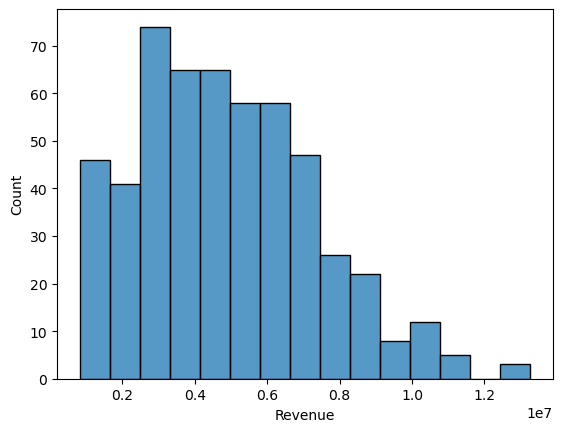

In [63]:
sns.histplot(train_set[train_set['Revenue'] < 1.5e7], x='Revenue') # Right-Skewness remains, so, logp1 transform is needed

In [64]:
train_b = train_set[train_set['Revenue'] < 1.5e7]

Xb = train_b[['Month', 'Region', 'Brand', 'Model', 'Vehicle_Type',
       'Battery_Capacity_kWh', 'Discount_Percentage', 'Customer_Segment',
       'Fast_Charging_Option']]
yb = np.log1p(train_b['Revenue'])

X_trainb, X_valb, y_trainb, y_valb = train_test_split(Xb, yb, test_size=0.3, random_state=42)

rd = GridSearchCV(
    estimator=pipe_rid, 
    param_grid=param_grid_rid,
    cv=5,
    n_jobs=-1,
    scoring='r2',
    verbose=10
)

# Fitting the model
rd.fit(X_trainb, y_trainb)

y_trainb_original = expm1(y_trainb)
y_valb_original = expm1(y_valb)

# Evaluation
best_rd = rd.best_estimator_

y_rd_train = best_rd.predict(X_trainb) # predicted y from training features with log-transformation
y_rd_train_original = expm1(y_rd_train) # predicted y from training features without log-transformation

y_rd = best_rd.predict(X_valb) # predicted y from validation features with log-transformation
y_rd_original = expm1(y_rd) # predicted y from validation features without log-transformation

print('Train R2: ', r2_score(y_trainb_original, y_rd_train_original))
print('Validation R2: ', r2_score(y_valb_original, y_rd_original))
mae_rd = mean_absolute_error(y_valb_original, y_rd_original)
print('ΜΑΕ: ', mae_rd)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Train R2:  0.12610628848273941
Validation R2:  0.030007530976395858
ΜΑΕ:  1872290.419650919


In [65]:
lr_b = GridSearchCV(
    estimator=pipelr,
    param_grid=param_gridlr,
    cv=5,
    n_jobs=-1,
    scoring='r2',
    verbose=10
)

# Fitting the model
lr_b.fit(X_trainb, y_trainb)

# Evaluation 
best_lr_b = lr_b.best_estimator_

y_lr_b_train = best_lr_b.predict(X_trainb) # predicted y from training features with log-transformation
y_lr_b_train_original = expm1(y_lr_b_train) # predicted y from training features without log-transformation

y_lr_b = best_lr_b.predict(X_valb) # predicted y from validation features with log-transformation
y_lr_b_original = expm1(y_lr_b) # predicted y from validation features without log-transformation

print('Train R2: ',      r2_score(y_trainb_original, y_lr_b_train_original))
print('Validation R2: ', r2_score(y_valb_original,   y_lr_b_original))
mae_lr_b = mean_absolute_error(y_valb_original, y_lr_b_original)
print('ΜΑΕ: ', mae_lr_b)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Train R2:  0.1280997591448504
Validation R2:  0.023624682731729685
ΜΑΕ:  1888678.9948962065


Finally, we see that Linear Models are not a good option for this dataset. Next, we will see Tree

### 3.2 Regression Trees Models

On the previous analysis we observed that there is a right-skew in the distribution of "Revenue". So, I will log-transform y and I will not test the case without the transformation, as I did in the linear models.

In [39]:
X = train_set.drop(['Revenue', 'Units_Sold'], axis=1)
y = train_set['Revenue']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
], remainder='passthrough')

tree_models = {
    'RandomForest':  RandomForestRegressor(random_state=42),
    'XGBoost':       XGBRegressor(objective='reg:squarederror', random_state=42),
    'DecisionTree':  DecisionTreeRegressor(random_state=42)
}

param_grids = {
    'RandomForest': {
        'model__n_estimators'    : [150, 200, 250],
        'model__max_depth'       : [10, 15],
        'model__min_samples_leaf': [2, 5, 7, 10],
        'model__max_features'    : ['sqrt', 0.5, 0.75, 1]
    },
    'XGBoost': {
        'model__n_estimators'  : [100, 150],
        'model__max_depth'     : [3],
        'model__learning_rate' : [0.05, 0.1],
        'model__subsample'     : [0.5, 0.7],
        'model__reg_alpha'     : [0, 0.1],
        'model__reg_lambda'    : [1, 2]
    },
    'DecisionTree': {
        'model__max_depth'        : [10, 20],
        'model__min_samples_leaf' : [1, 5],
        'model__min_samples_split': [2, 10],
        'model__max_features'     : [None, 'sqrt']
    }
}

best_tree_models = {}
MAE_tree_models   = {}
best_tree_params = {}

for name, model in tree_models.items():
    
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    gridsearch = GridSearchCV(
        estimator=pipe,
        param_grid=param_grids[name],
        cv=5, n_jobs=-1, scoring='r2'
    )
    gridsearch.fit(X_train, y_train)
    best_tree_models[name] = gridsearch.best_estimator_
    best_tree_params[name] = gridsearch.best_params_

    y_train_orig = y_train
    y_val_orig   = y_val

    y_pred_train_log = best_tree_models[name].predict(X_train) # predicted y from training features with log-transformation
    y_pred_val_log   = best_tree_models[name].predict(X_val) # predicted y from validation features with log-transformation

    y_pred_train_orig = y_pred_train_log # predicted y from training features without log-transformation
    y_pred_val_orig   = y_pred_val_log # predicted y from validation features without log-transformation

    # Evaluation
    r2_train_orig = r2_score(y_train_orig, y_pred_train_orig)
    r2_val_orig   = r2_score(y_val_orig,   y_pred_val_orig)
    mae_orig      = mean_absolute_error(y_val_orig, y_pred_val_orig)

    print(f"Results for {name}:")
    print(f"Best params: {gridsearch.best_params_}")
    print(f"R2 Train (orig): {r2_train_orig:.3f}")
    print(f"R2 Val   (orig): {r2_val_orig:.3f}")
    print(f"MAE      (orig): {mae_orig:.0f}")
    print("-" * 25)

    MAE_tree_models[name] = mae_orig


Results for RandomForest:
Best params: {'model__max_depth': 15, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__n_estimators': 250}
R2 Train (orig): 0.236
R2 Val   (orig): 0.062
MAE      (orig): 2016290
-------------------------
Results for XGBoost:
Best params: {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 100, 'model__reg_alpha': 0, 'model__reg_lambda': 2, 'model__subsample': 0.5}
R2 Train (orig): 0.475
R2 Val   (orig): 0.091
MAE      (orig): 1940294
-------------------------
Results for DecisionTree:
Best params: {'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 2}
R2 Train (orig): 0.244
R2 Val   (orig): 0.062
MAE      (orig): 1937985
-------------------------


After fitting grid search with various param_grid combinations, the models **did not increase their performance**. I conclude that some **feature engineering** is important. Looking back to EDA section, there are some information we can use. For example, at a glance, numerical variables (Battery Capacity and Discount) seems to not have any predict ability, but we observed that if we group them, there is a hidden pattern for both target variables.

### 3.3 Feature engineering

In [38]:
train = train_set.copy()
train['battery_bin'] = pd.qcut(train['Battery_Capacity_kWh'], q=6, labels = [f"Q{i+1}" for i in range(6)])
train['disc_bin'] = pd.qcut(train['Discount_Percentage'], q=7, labels = [f"Q{i+1}" for i in range(7)])

train.head()

,Month,Region,Brand,Model,Vehicle_Type,Battery_Capacity_kWh,Discount_Percentage,Customer_Segment,Fast_Charging_Option,Units_Sold,Revenue,battery_bin,disc_bin
0,7,Oceania,Toyota,i4,Crossover,62,6,High Income,0,260,3699780,Q3,Q3
1,3,Oceania,Toyota,Leaf,Truck,70,19,High Income,1,347,7801424,Q3,Q7
2,5,North America,Toyota,ID.5,Crossover,81,13,Middle Income,0,294,4813013,Q5,Q5
3,2,Oceania,Tesla,Corolla EV,Truck,73,4,High Income,1,281,7484912,Q4,Q2
4,10,North America,BYD,Leaf,Coupe,52,4,High Income,0,166,4025360,Q2,Q2


In [41]:
X = train.drop(['Revenue', 'Units_Sold', 'Battery_Capacity_kWh', 'Discount_Percentage', 'battery_bin', 'disc_bin'], axis=1)
y = train['Revenue']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

categorical = ['Region', 'Brand', 'Model', 'Vehicle_Type', 'Customer_Segment']
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical)
], remainder='passthrough')

tree_models = {
    'RandomForest':  RandomForestRegressor(random_state=42),
    'XGBoost':       XGBRegressor(objective='reg:squarederror', random_state=42),
    'DecisionTree':  DecisionTreeRegressor(random_state=42)
}

param_grids = {
    'RandomForest': {
        'model__n_estimators'    : [150, 200, 250],
        'model__max_depth'       : [10, 15],
        'model__min_samples_leaf': [2, 5, 7, 10],
        'model__max_features'    : ['sqrt', 0.5, 0.75, 1]
    },
    'XGBoost': {
        'model__n_estimators'  : [100, 150],
        'model__max_depth'     : [3],
        'model__learning_rate' : [0.05, 0.1],
        'model__subsample'     : [0.5, 0.7],
        'model__reg_alpha'     : [0, 0.1],
        'model__reg_lambda'    : [1, 2]
    },
    'DecisionTree': {
        'model__max_depth'        : [10, 20],
        'model__min_samples_leaf' : [1, 5],
        'model__min_samples_split': [2, 10],
        'model__max_features'     : [None, 'sqrt']
    }
}

best_tree_models = {}
MAE_tree_models   = {}
best_tree_params = {}

for name, model in tree_models.items():
    
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    gridsearch = GridSearchCV(
        estimator=pipe,
        param_grid=param_grids[name],
        cv=5, n_jobs=-1, scoring='r2'
    )
    gridsearch.fit(X_train, y_train)
    best_tree_models[name] = gridsearch.best_estimator_
    best_tree_params[name] = gridsearch.best_params_

    y_train_orig = y_train
    y_val_orig   = y_val

    y_pred_train_log = best_tree_models[name].predict(X_train) # predicted y from training features with log-transformation
    y_pred_val_log   = best_tree_models[name].predict(X_val) # predicted y from validation features with log-transformation

    y_pred_train_orig = y_pred_train_log # predicted y from training features without log-transformation
    y_pred_val_orig   = y_pred_val_log # predicted y from validation features without log-transformation

    # Evaluation
    r2_train_orig = r2_score(y_train_orig, y_pred_train_orig)
    r2_val_orig   = r2_score(y_val_orig,   y_pred_val_orig)
    mae_orig      = mean_absolute_error(y_val_orig, y_pred_val_orig)

    print(f"Results for {name}:")
    print(f"Best params: {gridsearch.best_params_}")
    print(f"R2 Train (orig): {r2_train_orig:.3f}")
    print(f"R2 Val   (orig): {r2_val_orig:.3f}")
    print(f"MAE      (orig): {mae_orig:.0f}")
    print("-" * 25)

    MAE_tree_models[name] = mae_orig


Results for RandomForest:
Best params: {'model__max_depth': 15, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__n_estimators': 200}
R2 Train (orig): 0.146
R2 Val   (orig): -0.030
MAE      (orig): 2078244
-------------------------
Results for XGBoost:
Best params: {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 100, 'model__reg_alpha': 0, 'model__reg_lambda': 2, 'model__subsample': 0.5}
R2 Train (orig): 0.370
R2 Val   (orig): -0.087
MAE      (orig): 2084989
-------------------------
Results for DecisionTree:
Best params: {'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 2}
R2 Train (orig): 0.156
R2 Val   (orig): -0.179
MAE      (orig): 2217898
-------------------------


## Save/Load

In [69]:
# SAVE

variables_dict = {
    'train_set': train_set,
    'test_set': test_set,
    'cat_cols': cat_cols,
    'num_cols': num_cols,
}

joblib.dump(variables_dict, 'ev_sales_project.joblib')

best_models = {
    'ridge1': best_ridge1,
    'ridge2': best_ridge2,
    'ridgeb': best_rd,
    'lr1': best_lr1,
    'lr2': best_lr2,
    'best_tree_models': best_tree_models,
    'best_tree_params': best_tree_params,
    'MAE_tree_models': MAE_tree_models,    
}

joblib.dump(best_models, 'models.joblib')

['models.joblib']

In [2]:
# LOAD

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from xgboost import XGBRegressor
from numpy import expm1, log1pg

loaded_objects = joblib.load('ev_sales_project.joblib')

train_set = loaded_objects['train_set']
test_set = loaded_objects['test_set']
cat_cols = loaded_objects['cat_cols']
num_cols = loaded_objects['num_cols']

loaded_models = joblib.load('models.joblib')
best_ridge1 = loaded_models['ridge1']
best_ridge2 =loaded_models['ridge2']
best_rd = loaded_models['ridgeb']
best_lr1 = loaded_models['lr1']
best_lr2 = loaded_models['lr2']

best_tree_models = loaded_models['best_tree_models']
best_tree_params = loaded_models['best_tree_params']
MAE_tree_models = loaded_models['MAE_tree_models']